In [1]:
%matplotlib qt5
import matplotlib
from qutip import *
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math, Image, Latex
init_printing()

$$\newcommand{\vp}{\varphi}$$

## 4-junction flux qubit

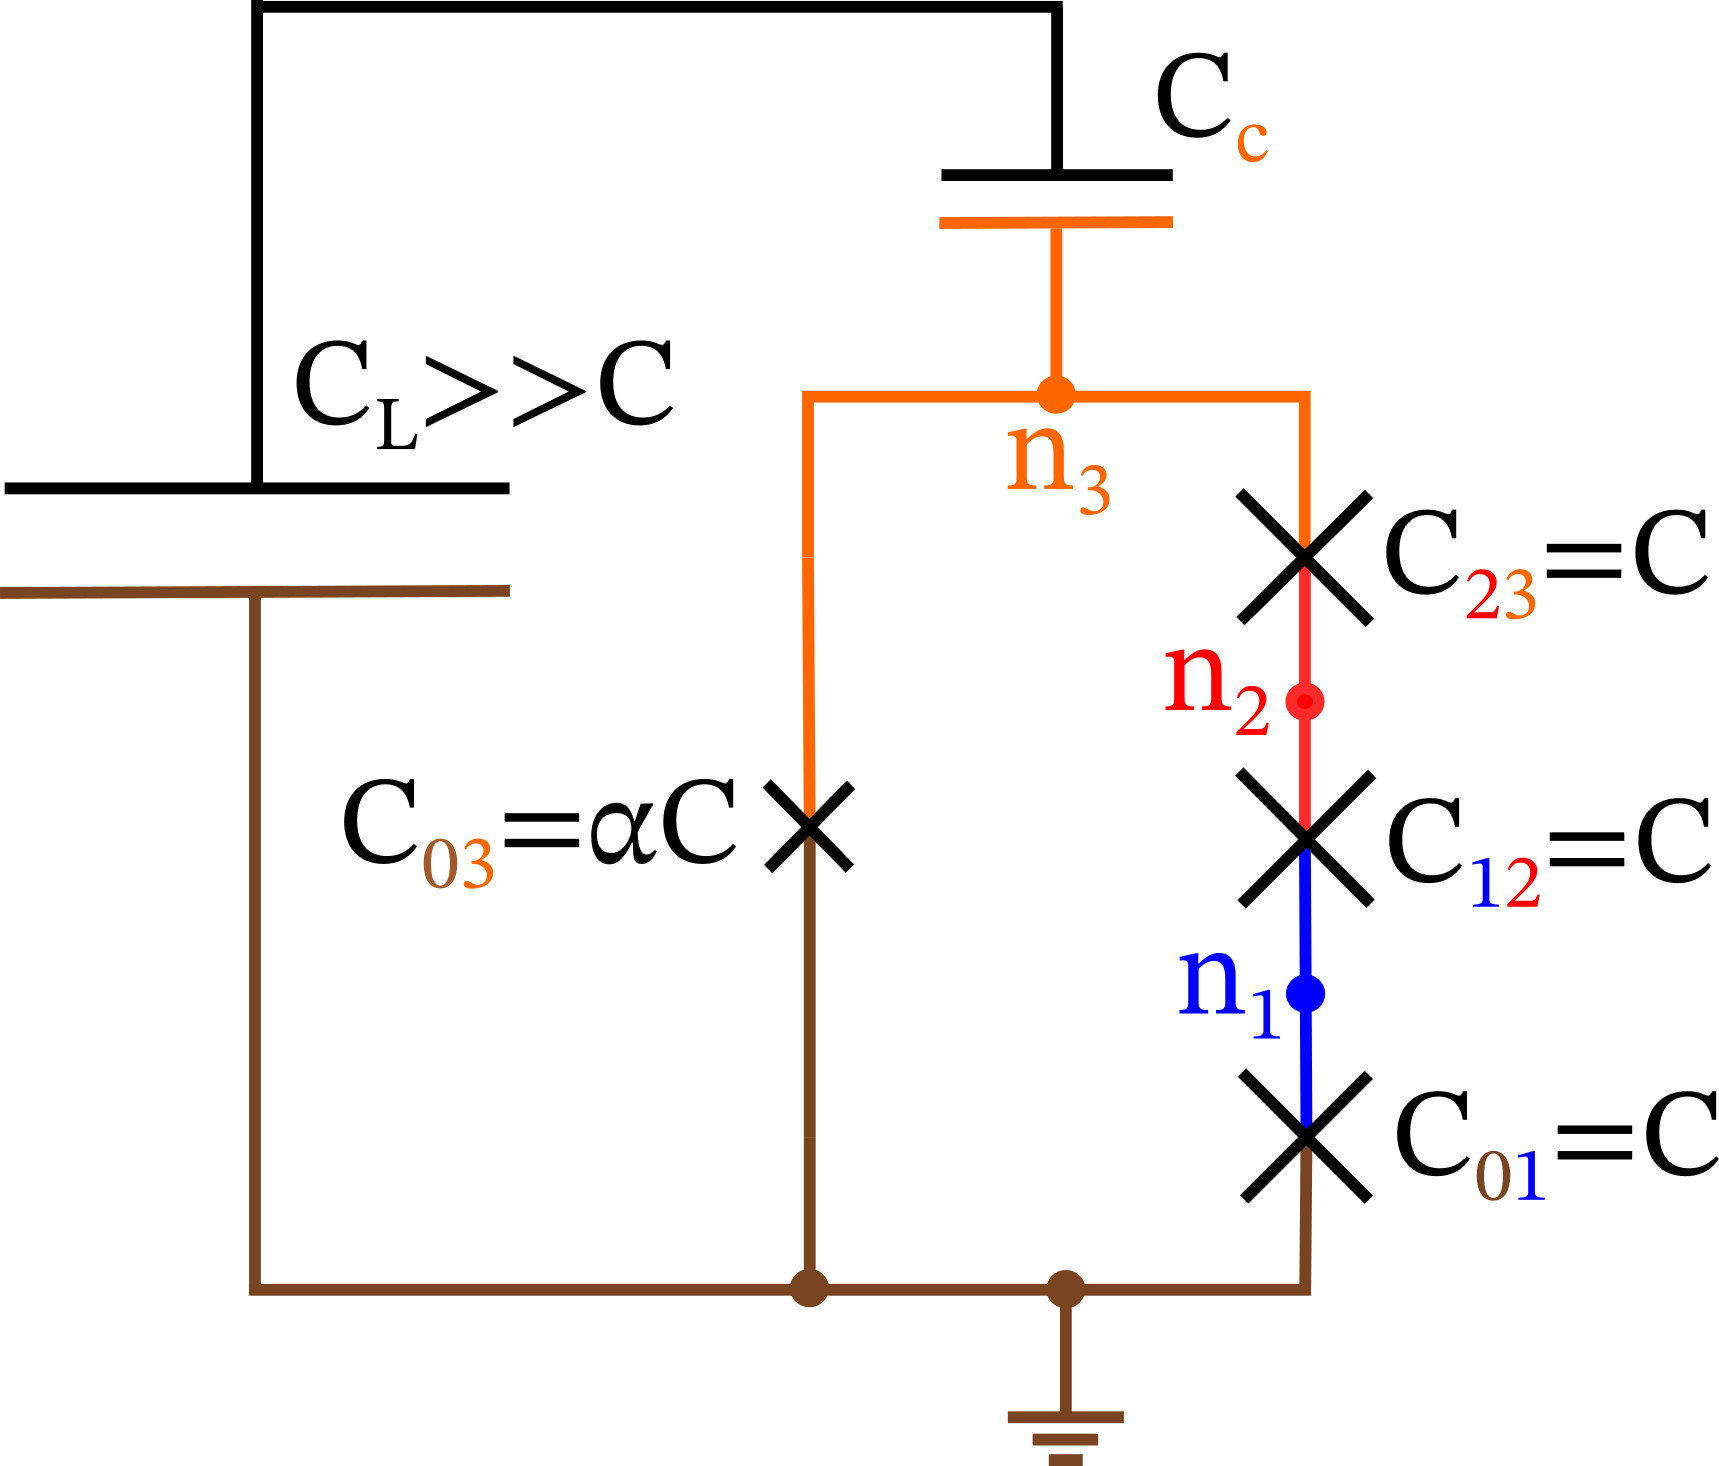

In [2]:
Image(filename='images/4jj_flux_qubit.png', width=500)

## Flux qubit Hamiltonian

**$\large{E_c}$ is defined as:$$E_c =\frac{4e^2}{C}$$** in order to have good expression for the whole charging energy $E_C$ (see below).

In the Lagrangian, we initially will use the superconducting phases at the islands as variables: $(\vp_1, \vp_2, \vp_3)$. Then the voltage between islands $i,j$ could be written due to Josephson relation:

$$V_{ij} = \phi_j - \phi_i = \frac{\hbar}{2e}\frac{\partial({\vp_j-\vp_i})}{\partial{t}}$$

and hence $\phi_j = \frac{\hbar}{2e}\frac{\partial{\vp_j}}{\partial{t}}$

The charging energy is then the kinetic energy, which could be expressed as:

$$E_C = \frac{1}{2}\vec{\phi}^T \mathbf{C}\vec{\phi}$$

where $\phi^T = (\phi_1, \phi_2, \phi_3 )$ and $\mathbf{C}$ is capacitance matrix, which element $C_{ij}$ is a coefficient of proportionality between charge on the island $q_i$ and electrostatic potential induced at any another island $\phi_j$:

\begin{equation}
\begin{pmatrix}
q_1\\q_2\\q_3\\
\end{pmatrix}=
\begin{pmatrix}
C_{11}&C_{12}&C_{13}\\C_{21}&C_{22}&C_{23}\\C_{31}&C_{32}&C_{33}\\
\end{pmatrix}\cdot
\begin{pmatrix}
 \phi_1\\ \phi_2\\ \phi_3\\
\end{pmatrix}
\end{equation}

Quite obviously, $\mathbf{C}$ must be symmetrical. Now we can write the Lagrangian:

\begin{multline}
\mathbf{L} = T-P = E_C - E_J = \frac{1}{2}\frac{\hbar^2}{4e^2} \dot{\vec{\vp}}^T \mathbf{C} \dot{\vec{\vp}} +E_j^{01} \cos(\varphi_1) + E_j^{12} \cos(\varphi_2-\varphi_1) + \space\\
+E_J^{23} \cos(\varphi_3 - \varphi_2) + E_J^{03} \cos(\varphi_3 - 2\pi\frac{\Phi}{\Phi_0})
\end{multline}

The most mysterious thing about $E_J$ is that it is not so clear how to put external flux into it. According to Devoret's seminal paper, we must drop it into the closure branch, as we fixed another phases as independent variables, but I don't really understand this argument. And someone (particularly Oleg Astafiev) claims that the spectra and everything does not depend on where the magnetic flux is inserted. This is not obvious and is a thing to check.

Then we can make a Legendre transformations and introduce dual momenta:

$$\vec{p}^{(\vec{\vp})} = \frac{\partial L}{\partial \dot{\vec{\vp}}} = \frac{1}{2}
\big[ (\underbrace{\dot{\vec{\vp}}^T \mathbf{C}}_{\vec{q}^T})^T  +\underbrace{\mathbf{C} \dot{\vec{\vp}}}_{\vec{q}}\big] = \vec{q}$$ 
$$\vec{\dot{\vp}} = \mathbf{C}^{-1}\vec{q}$$

which is trivially reflects the fact that the phase and charge are canonically conjugate coordinates.

The Hamiltonian reads:

$$\mathbf{H} =\vec{\dot{\vp}}^T\cdot\vec{q} - \mathbf{L}$$

\begin{align}
\mathbf{H} &= E_C + E_J = \frac{1}{2}{\vec{q}}^T \mathbf{C}^{-1} \space\vec{q} +E_J \\
\end{align}

### Capacitance matrix

In [14]:
C_01,C_12,C_23,C_03,E_c,E_cc,alpha,N_1,N_2,N_3,r,rs,C_c,V_0,H_int,e = symbols('C_{01} C_{12} C_{23} C_{03} E_c E_cc alpha N_1 N_2 N_3 r r_s C_c V_0 H_int e')

In [15]:
M = Matrix([[C_01+C_12, -C_12, 0],
            [-C_12, C_12+C_23, -C_23],
            [0, -C_23, C_23+C_03]])
M

⎡C_{01} + C_{12}      -C_{12}             0       ⎤
⎢                                                 ⎥
⎢    -C_{12}      C_{12} + C_{23}      -C_{23}    ⎥
⎢                                                 ⎥
⎣       0             -C_{23}      C_{03} + C_{23}⎦

In [16]:
M_energies = M.subs([(C_23,1/E_c),
                     (C_01,1/E_c),
                     (C_12,1/E_c),
                     (C_03,alpha/E_c + 1/E_cc)])
M_energies

⎡ 2   -1                   ⎤
⎢───  ───         0        ⎥
⎢E_c  E_c                  ⎥
⎢                          ⎥
⎢-1    2         -1        ⎥
⎢───  ───        ───       ⎥
⎢E_c  E_c        E_c       ⎥
⎢                          ⎥
⎢     -1    1      α     1 ⎥
⎢ 0   ───  ──── + ─── + ───⎥
⎣     E_c  E_cc   E_c   E_c⎦

In [17]:
MI_energies = simplify(M_energies**-1).subs({3*E_cc*alpha + E_cc : E_cc*(3*alpha+1),
                                               2*E_cc*alpha+E_cc : E_cc*(2*alpha+1),
                                                 E_cc*alpha+E_cc : E_cc*(alpha+1)})
MI_energies

⎡E_c⋅(2⋅E_c + E_cc⋅(2⋅α + 1))   E_c⋅(E_c + E_cc⋅(α + 1))          E_c⋅E_cc    
⎢────────────────────────────   ────────────────────────   ───────────────────
⎢   3⋅E_c + E_cc⋅(3⋅α + 1)       3⋅E_c + E_cc⋅(3⋅α + 1)    3⋅E_c + E_cc⋅(3⋅α +
⎢                                                                             
⎢  E_c⋅(E_c + E_cc⋅(α + 1))    2⋅E_c⋅(E_c + E_cc⋅(α + 1))        2⋅E_c⋅E_cc   
⎢  ────────────────────────    ──────────────────────────  ───────────────────
⎢   3⋅E_c + E_cc⋅(3⋅α + 1)       3⋅E_c + E_cc⋅(3⋅α + 1)    3⋅E_c + E_cc⋅(3⋅α +
⎢                                                                             
⎢          E_c⋅E_cc                    2⋅E_c⋅E_cc                3⋅E_c⋅E_cc   
⎢   ──────────────────────       ──────────────────────    ───────────────────
⎣   3⋅E_c + E_cc⋅(3⋅α + 1)       3⋅E_c + E_cc⋅(3⋅α + 1)    3⋅E_c + E_cc⋅(3⋅α +

   ⎤
───⎥
 1)⎥
   ⎥
   ⎥
───⎥
 1)⎥
   ⎥
   ⎥
───⎥
 1)⎦

In [18]:
mullt = (3*E_c + E_cc*(3*alpha+1))/(E_c*E_cc)

In [19]:
MI_energies = simplify(MI_energies)

In [20]:
MI_energies = simplify((MI_energies*mullt)).subs({E_c/E_cc : r})

In [21]:
MI_energ_simple = factor(MI_energies).subs({alpha+r+1: rs,
                                            2*alpha+2*r+1: 2*rs-1})
MI_energ_simple

⎡2⋅rₛ - 1   rₛ   1⎤
⎢                 ⎥
⎢   rₛ     2⋅rₛ  2⎥
⎢                 ⎥
⎣   1       2    3⎦

In [22]:
print(latex(simplify(1/mullt.subs({E_cc: E_c/r }))) + '\cdot'+ latex(MI_energ_simple))

\frac{E_{c}}{3 \alpha + 3 r + 1}\cdot\left[\begin{matrix}2 r_{s} - 1 & r_{s} & 1\\r_{s} & 2 r_{s} & 2\\1 & 2 & 3\end{matrix}\right]


$$\mathbf{C}^{-1}=\frac{E_{c}}{ 3 r_s - 2}\cdot\left[\begin{matrix}2 rs - 1 & rs & 1\\rs & 2 rs & 2\\1 & 2 & 3\end{matrix}\right], \space r_s = \alpha + r + 1, \space r = \frac{E_c}{E_{cc}}$$

In [23]:
C_rev = E_c/(3*rs-2)*MI_energ_simple

In [24]:
C_rev

⎡E_c⋅(2⋅rₛ - 1)   E_c⋅rₛ     E_c   ⎤
⎢──────────────  ────────  ────────⎥
⎢   3⋅rₛ - 2     3⋅rₛ - 2  3⋅rₛ - 2⎥
⎢                                  ⎥
⎢    E_c⋅rₛ      2⋅E_c⋅rₛ   2⋅E_c  ⎥
⎢   ────────     ────────  ────────⎥
⎢   3⋅rₛ - 2     3⋅rₛ - 2  3⋅rₛ - 2⎥
⎢                                  ⎥
⎢     E_c         2⋅E_c     3⋅E_c  ⎥
⎢   ────────     ────────  ────────⎥
⎣   3⋅rₛ - 2     3⋅rₛ - 2  3⋅rₛ - 2⎦

____________________

In [25]:
MI = M**(-1)
MS=simplify(MI.subs([(C_23,1/E_c),(C_01,1/E_c),(C_12,1/E_c),(C_03,alpha/E_c+1/E_cc)]))

In [26]:
MS

⎡E_c⋅(2⋅E_c + 2⋅E_cc⋅α + E_cc)   E_c⋅(E_c + E_cc⋅α + E_cc)           E_c⋅E_cc 
⎢─────────────────────────────   ─────────────────────────   ─────────────────
⎢   3⋅E_c + 3⋅E_cc⋅α + E_cc       3⋅E_c + 3⋅E_cc⋅α + E_cc    3⋅E_c + 3⋅E_cc⋅α 
⎢                                                                             
⎢  E_c⋅(E_c + E_cc⋅α + E_cc)    2⋅E_c⋅(E_c + E_cc⋅α + E_cc)         2⋅E_c⋅E_cc
⎢  ─────────────────────────    ───────────────────────────  ─────────────────
⎢   3⋅E_c + 3⋅E_cc⋅α + E_cc       3⋅E_c + 3⋅E_cc⋅α + E_cc    3⋅E_c + 3⋅E_cc⋅α 
⎢                                                                             
⎢           E_c⋅E_cc                     2⋅E_c⋅E_cc                 3⋅E_c⋅E_cc
⎢   ───────────────────────       ───────────────────────    ─────────────────
⎣   3⋅E_c + 3⋅E_cc⋅α + E_cc       3⋅E_c + 3⋅E_cc⋅α + E_cc    3⋅E_c + 3⋅E_cc⋅α 

      ⎤
──────⎥
+ E_cc⎥
      ⎥
      ⎥
──────⎥
+ E_cc⎥
      ⎥
      ⎥
──────⎥
+ E_cc⎦

In [27]:
MS1 = MS.subs(E_c, 19).subs(alpha, 0.4).subs(E_cc, 70)
MS1

⎡14.7677725118483  10.5355450236967  6.30331753554502⎤
⎢                                                    ⎥
⎢10.5355450236967  21.0710900473934   12.60663507109 ⎥
⎢                                                    ⎥
⎣6.30331753554502   12.60663507109   18.9099526066351⎦

In [28]:
MS2 = (MI_energ_simple/mullt)#.subs({:,:,:,:})\
MS2

⎡ E_c⋅E_cc⋅(2⋅rₛ - 1)         E_c⋅E_cc⋅rₛ               E_c⋅E_cc       ⎤
⎢──────────────────────  ──────────────────────  ──────────────────────⎥
⎢3⋅E_c + E_cc⋅(3⋅α + 1)  3⋅E_c + E_cc⋅(3⋅α + 1)  3⋅E_c + E_cc⋅(3⋅α + 1)⎥
⎢                                                                      ⎥
⎢     E_c⋅E_cc⋅rₛ            2⋅E_c⋅E_cc⋅rₛ             2⋅E_c⋅E_cc      ⎥
⎢──────────────────────  ──────────────────────  ──────────────────────⎥
⎢3⋅E_c + E_cc⋅(3⋅α + 1)  3⋅E_c + E_cc⋅(3⋅α + 1)  3⋅E_c + E_cc⋅(3⋅α + 1)⎥
⎢                                                                      ⎥
⎢       E_c⋅E_cc               2⋅E_c⋅E_cc              3⋅E_c⋅E_cc      ⎥
⎢──────────────────────  ──────────────────────  ──────────────────────⎥
⎣3⋅E_c + E_cc⋅(3⋅α + 1)  3⋅E_c + E_cc⋅(3⋅α + 1)  3⋅E_c + E_cc⋅(3⋅α + 1)⎦

## Definitions of the parameters

Energies in GHz:

In [29]:
Ec = 19
Ej = 80
Ecc = 70
al = 0.4
N = 5

## Construction of the effective Hamiltonian

In [30]:
import qutip as qp
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cmx
import itertools

In [31]:
def extended_tunneling(N,multiplier=1):
    obj = Qobj(np.diag(np.ones(2*N+1), -1))*multiplier + Qobj(np.diag(np.ones(2*N+1), 1))*np.conj(multiplier)
    return obj 
def lowering(N):
    return Qobj(np.diag(np.ones(2*N), 1))
def raising(N):
    return Qobj(np.diag(np.ones(2*N), -1))

In [32]:
MS

⎡E_c⋅(2⋅E_c + 2⋅E_cc⋅α + E_cc)   E_c⋅(E_c + E_cc⋅α + E_cc)           E_c⋅E_cc 
⎢─────────────────────────────   ─────────────────────────   ─────────────────
⎢   3⋅E_c + 3⋅E_cc⋅α + E_cc       3⋅E_c + 3⋅E_cc⋅α + E_cc    3⋅E_c + 3⋅E_cc⋅α 
⎢                                                                             
⎢  E_c⋅(E_c + E_cc⋅α + E_cc)    2⋅E_c⋅(E_c + E_cc⋅α + E_cc)         2⋅E_c⋅E_cc
⎢  ─────────────────────────    ───────────────────────────  ─────────────────
⎢   3⋅E_c + 3⋅E_cc⋅α + E_cc       3⋅E_c + 3⋅E_cc⋅α + E_cc    3⋅E_c + 3⋅E_cc⋅α 
⎢                                                                             
⎢           E_c⋅E_cc                     2⋅E_c⋅E_cc                 3⋅E_c⋅E_cc
⎢   ───────────────────────       ───────────────────────    ─────────────────
⎣   3⋅E_c + 3⋅E_cc⋅α + E_cc       3⋅E_c + 3⋅E_cc⋅α + E_cc    3⋅E_c + 3⋅E_cc⋅α 

      ⎤
──────⎥
+ E_cc⎥
      ⎥
      ⎥
──────⎥
+ E_cc⎥
      ⎥
      ⎥
──────⎥
+ E_cc⎦

In [33]:
MS1 = np.array(MS1.tolist()).astype(np.float64)
MS1

array([[ 14.76777251,  10.53554502,   6.30331754],
       [ 10.53554502,  21.07109005,  12.60663507],
       [  6.30331754,  12.60663507,  18.90995261]])

In [34]:
def H_c(n_ind, Ec, Ecc, N):
    charge_ind = n_ind*qp.tensor(qp.basis(2*N+1,0)*qp.basis(2*N+1,0).trans(),
                                 qp.identity(2*N+1),
                                 qp.identity(2*N+1))
    charge_ind = qp.tensor(qp.qzero(2*N+1), qp.qzero(2*N+1), qp.qzero(2*N+1)), \
                qp.tensor(qp.qzero(2*N+1), qp.qzero(2*N+1), qp.qzero(2*N+1)), \
                n_ind*qp.tensor(qp.identity(2*N+1),qp.identity(2*N+1),qp.identity(2*N+1))
                    
    #print(charge_ind[1])        
    charge_ops = qp.tensor(charge(N),
                           identity(2*N+1),
                           identity(2*N+1)), \
                 qp.tensor(identity(2*N+1),
                           charge(N),
                           identity(2*N+1)), \
                 qp.tensor(identity(2*N+1),
                           identity(2*N+1),
                           charge(N))
    charge_ops = charge_ops 
    H_cc = qp.tensor(qp.qzero(2*N+1), qp.qzero(2*N+1), qp.qzero(2*N+1))
    ms1 = MS.subs(E_c, Ec).subs(alpha, al).subs(E_cc, Ecc)
    charge_coeffs = np.array(ms1.tolist()).astype(np.float64)
    for i in range(0,3):
        for j in range(0,3):
            H_cc += 0.5*(charge_ops[i]+charge_ind[i])*charge_coeffs[i,j]*(charge_ops[j]+charge_ind[j])
    return H_cc

In [35]:
def H_J(f,Ej,al,N):
    H1 = qp.tensor(0.5*qp.tunneling(2*N+1, 1), identity(2*N+1), identity(2*N+1))
    H2 =  0.5*qp.tensor(lowering(N), raising(N), identity(2*N+1))+\
         0.5*qp.tensor(raising(N), lowering(N), identity(2*N+1))
    H3 =  0.5*qp.tensor(identity(2*N+1), lowering(N), raising(N))+\
         0.5*qp.tensor(identity(2*N+1), raising(N), lowering(N))
    H4 = 0.5*np.exp(-2*np.pi*1j*f)*qp.tensor(identity(2*N+1), identity(2*N+1), lowering(N))+\
         0.5*np.exp(2*np.pi*1j*f)*qp.tensor(identity(2*N+1), identity(2*N+1), raising(N))
    tunneling_ops = (H1,H2,H3,H4)                    
    H_J = qp.tensor(qp.qzero(2*N+1), qp.qzero(2*N+1), qp.qzero(2*N+1))
    E_Js = [Ej, Ej, Ej, al*Ej]
    for idx, tunneling_op in enumerate(tunneling_ops):
        H_J -= E_Js[idx]*tunneling_op
    return H_J

In [7]:
H_jj = H_J(0.5,70,0.5,2).full()
plt.imshow(H_jj.real)

In [36]:
Ec = 17.6
Ej = 80
Ecc = 70
al = 0.4
N = 1

In [37]:
def array_eins(f_0,f_1,Nf,n_ind,Ec,Ecc,N,Ej):
    arr_evals = []
    arr_einvects = []
    fs = np.linspace(f_0,f_1,Nf)
    for f in fs: 
        print('\r{:g} '.format(f), end='')
        H = H_J(f,Ej,al,N) + H_c(n_ind,Ec,Ecc,N)
        evals, einvects = H.eigenstates(sparse=True,eigvals=5)
        arr_evals.append(evals)
        arr_einvects.append(einvects)
    return arr_einvects, arr_evals, fs

In [38]:
def plot_einenergies(engs,fs):
    for idx in range(1,engs.shape[1]):
        plt.plot(fs,engs[:,idx]-engs[:,0], label=r'$E_{%s}-E_{%s}$'%(idx,0))
    print(engs[len(fs)//2,1]-engs[len(fs)//2,0],
      engs[len(fs)//2,2]-engs[len(fs)//2,1],
      engs[len(fs)//2,3]-engs[len(fs)//2,2],
      engs[len(fs)//2,4]-engs[len(fs)//2,3]) 
    plt.legend()
    plt.grid()

In [39]:
def scatter3d(ax,fig,x,y,z,cs, colorsMap='RdBu_r'):
    cm = plt.get_cmap(colorsMap)
    cNorm = matplotlib.colors.Normalize(vmin=min(cs), vmax=max(cs))
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
    ax.scatter(x, y, z, c=scalarMap.to_rgba(cs), alpha=0.5)
    scalarMap.set_array(cs)
    fig.colorbar(scalarMap)
    #plt.colorbar

In [40]:
def plot_einvect(einvects,index=0,x_slice=0,y_slice=0,z_slice=0):
    v = einvects[index]
    fig = plt.figure(1)
    fig2,axes = plt.subplots(1,3)
    ax = Axes3D(fig)
   # ax = fig.add_subplot(111, projection='3d')
    n1 = np.arange(-N, N+1, 1)
    n2 = np.arange(-N, N+1, 1)
    n3 = np.arange(-N, N+1, 1)
    ns = itertools.product(n1,n2,n3)
    nl=np.array(list(ns))
    c = np.real(v.full())
    scat = scatter3d(ax,fig,nl[:,0], nl[:,1], nl[:,2], cs=c[:,0])
    v_reshaped = np.real(np.reshape(v.full(),v.dims[0])) 
    x_data = v_reshaped[x_slice,...]
    sl_1 = axes[0].imshow(x_data, origin='lower', cmap='RdBu_r',vmin = x_data.min(), vmax=x_data.max())
    y_data = v_reshaped[:,y_slice,:]
    sl_2 = axes[1].imshow(y_data, origin='lower', cmap='RdBu_r',vmin = y_data.min(), vmax=y_data.max())
    z_data = v_reshaped[:,:,z_slice]
    sl_3 = axes[2].imshow(z_data, origin='lower', cmap='RdBu_r',vmin = z_data.min(), vmax=z_data.max())
    #plt.(colorbar)
    #plt.tight_layout()

In [69]:
Ec = 17.6
Ej = 86
Csh = 51e-15
print(Ecc)
al = 0.4
N = 1
H_J(0.5,Ej,al,N)

3.526903021621347


Quantum object: dims = [[3, 3, 3], [3, 3, 3]], shape = (27, 27), type = oper, isherm = True
Qobj data =
[[  0.   17.2   0.    0.    0.    0.    0.    0.    0.  -43.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0. ]
 [ 17.2   0.   17.2 -43.    0.    0.    0.    0.    0.    0.  -43.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0. ]
 [  0.   17.2   0.    0.  -43.    0.    0.    0.    0.    0.    0.  -43.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0. ]
 [  0.  -43.    0.    0.   17.2   0.    0.    0.    0.  -43.    0.    0.
  -43.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0. ]
 [  0.    0.  -43.   17.2   0.   17.2 -43.    0.    0.    0.  -43.    0.
    0.  -43.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0. ]
 [  0.    0.    0.    0.   17.2   0.    0.  -43.    0.    0. 

In [72]:
Evs, Engs, Fs = array_eins(0.4,0.6,41,0.0, Ec, Ecc, 1, Ej)

0.6 5 

In [73]:
plot_einenergies(np.array(Engs),Fs)

4.08287264331 22.473375963 22.9484757918 8.30352937997


In [48]:
plt.plot(abs(Evs[20][0].full()))

In [49]:
Evs[20][0]

Quantum object: dims = [[11, 11, 11], [1, 1, 1]], shape = (1331, 1), type = ket
Qobj data =
[[ 0.+0.j]
 [ 0.+0.j]
 [ 0.+0.j]
 ..., 
 [ 0.+0.j]
 [ 0.+0.j]
 [ 0.+0.j]]

In [45]:
plot_einvect(Evs[(len(Fs)-1)//2],3,N,N,N)

## Charge_zones_simulation and Coupling estimation

In [49]:
C_rev

⎡E_c⋅(2⋅rₛ - 1)   E_c⋅rₛ     E_c   ⎤
⎢──────────────  ────────  ────────⎥
⎢   3⋅rₛ - 2     3⋅rₛ - 2  3⋅rₛ - 2⎥
⎢                                  ⎥
⎢    E_c⋅rₛ      2⋅E_c⋅rₛ   2⋅E_c  ⎥
⎢   ────────     ────────  ────────⎥
⎢   3⋅rₛ - 2     3⋅rₛ - 2  3⋅rₛ - 2⎥
⎢                                  ⎥
⎢     E_c         2⋅E_c     3⋅E_c  ⎥
⎢   ────────     ────────  ────────⎥
⎣   3⋅rₛ - 2     3⋅rₛ - 2  3⋅rₛ - 2⎦

In [50]:
q_qb = Matrix([[N_1],[N_2],[N_3]])
q_ind = Matrix([[0],[0],[2*C_c*V_0*e]])
Qq = q_qb + q_ind
H_int = simplify(q_qb.transpose()*C_rev*q_ind + q_ind.transpose()*C_rev*q_qb)

In [56]:
simplify(Qq.transpose()*C_rev*Qq)

⎡E_c⋅(N₁⋅(2⋅C_c⋅V₀⋅e + N₁⋅(2⋅rₛ - 1) + N₂⋅rₛ + N₃) + N₂⋅(4⋅C_c⋅V₀⋅e + N₁⋅rₛ + 
⎢─────────────────────────────────────────────────────────────────────────────
⎣                                                                     3⋅rₛ - 2

2⋅N₂⋅rₛ + 2⋅N₃) + (2⋅C_c⋅V₀⋅e + N₃)⋅(6⋅C_c⋅V₀⋅e + N₁ + 2⋅N₂ + 3⋅N₃))⎤
────────────────────────────────────────────────────────────────────⎥
                                                                    ⎦

In [52]:
print('H_{int}='+latex(H_int))

H_{int}=\left[\begin{matrix}\frac{4 C_{c} E_{c} V_{0} e}{3 r_{s} - 2} \left(N_{1} + 2 N_{2} + 3 N_{3}\right)\end{matrix}\right]


$$H_{int}=\left[\begin{matrix}\frac{4 C_{c} E_{c} V_{0} e}{3 rs - 2} \left(N_{1} + 2 N_{2} + 3 N_{3}\right)\end{matrix}\right]$$

### Constructing numerical Hamiltonian from first $n$ levels

In [64]:
matplotlib.rcParams['axes.labelsize'] = 14

In [65]:
N

In [66]:
evs_reshaped = []
for vect in Evs[(len(Fs)-1)//2]:
    evs_reshaped.append(vect.full().reshape(vect.dims[0]))


In [67]:
H_num = np.zeros((len(Evs[0]),len(Evs[0])), dtype=complex)
for iv,vect in enumerate(evs_reshaped):
    for iv2,vect2 in enumerate(evs_reshaped):
        for i in range(vect.shape[0]):
            for j in range(vect.shape[1]):
                for k in range(vect.shape[2]): 
                    H_num[iv,iv2] += (i-N)+2*(j-N)+3*(k-N) * (vect[i,j,k].conj()*(vect2[i,j,k]))

In [68]:
H_numobj = Qobj(H_num).tidyup()

In [69]:
H_numobj

Quantum object: dims = [[5], [5]], shape = (5, 5), type = oper, isherm = True
Qobj data =
[[ 0.00000000+0.j          0.91754308-0.9450773j   0.00000000+0.j
   0.08988065+0.57955689j  2.04428735-0.09927011j]
 [ 0.91754308+0.9450773j   0.00000000+0.j          0.55175774+2.40281985j
   0.00000000+0.j          0.00000000+0.j        ]
 [ 0.00000000+0.j          0.55175774-2.40281985j  0.00000000+0.j
  -2.05329811-2.44390583j -0.10857796+0.07323836j]
 [ 0.08988065-0.57955689j  0.00000000+0.j         -2.05329811+2.44390583j
   0.00000000+0.j          0.00000000+0.j        ]
 [ 2.04428735+0.09927011j  0.00000000+0.j         -0.10857796-0.07323836j
   0.00000000+0.j          0.00000000+0.j        ]]

In [70]:
def Omega_MHz(Power_in, Ec, Ecc, al, Ej, N,f=0.5):
    evs, engs, fs = array_eins(f,f+0.01,1,0.0, Ec, Ecc, N, Ej)
    #print(engs[0][1]-engs[0][0])
    evs_reshaped = []
    for vect in evs[0]:
        evs_reshaped.append(vect.full().reshape(vect.dims[0]))
    H_n = np.zeros((len(evs[0]),len(evs[0])), dtype=complex)
    for iv,vect in enumerate(evs_reshaped):
        for iv2,vect2 in enumerate(evs_reshaped):
            for i in range(vect.shape[0]):
                for j in range(vect.shape[1]):
                    for k in range(vect.shape[2]): 
                        H_n[iv,iv2] += (i-N)+2*(j-N)+3*(k-N) * (vect[i,j,k].conj()*(vect2[i,j,k]))

    H_numobj = Qobj(H_n).tidyup()
    #print(H_numobj)
    Omega = H_int.subs({C_c: 1/E_cc,
                e: 1.6e-19,
                rs: alpha + r + 1}).subs({r: Ec/Ecc}).subs({E_c: Ec,
                                          E_cc: Ecc,
                                          N_1 + 2*N_2 + 3*N_3 : abs(H_numobj[1,0]),
                                          alpha: al,
                                          V_0: np.power(10.0, (Power_in-10)/20)/6.63e-34/1e6}) 
    return Omega[0].round(3), engs[0][1]-engs[0][0]

In [74]:
Oms = []
E01s = []
Ecs = np.linspace(1,100,101) 
for Ecc in Ecs:
    Omega_cur, E01 = Omega_MHz(-150,24,Ecc,0.4,80,5)
    Oms.append(Omega_cur);
    E01s.append(E01)
fig = plt.figure(2)
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax.plot(Ecs, np.array(Oms), 'o', mec='orange', mew=1.5,mfc='white');
ax.set_xlabel(r'$E_{cc}$, GHz')
ax.set_ylabel(r'$\Omega_{drive}$, MHz')

ax2.plot(Ecs, E01s, 'o', mec='red', mew=1.5, mfc='white');
ax2.set_xlabel(r'$E_{cc}$, GHz')
ax2.set_ylabel(r'$E_{0\rightarrow 1}$, GHz')
plt.tight_layout()
ax.grid(True)
ax2.grid(True)


0.5 

In [ ]:
Oms = []
Powers = np.linspace(-150,-100,51) 
for P in Powers:
    Oms.append(Omega_MHz(P,24,70,0.4,80,5));
plt.plot(Powers, np.array(Oms), 'o');

In [ ]:
Oms = []
Fs = np.linspace(0.2,0.8,101) 
for f in Fs:
    Oms.append(Omega_MHz(-150,24,70,0.4,80,5,f=f));
plt.plot(Fs, np.array(Oms), 'o');

In [ ]:
Oms = []
Ejs = np.linspace(20,400,51) 
for Ej in Ejs:
    Oms.append(Omega_MHz(-140,24,70,0.4,Ej,5))
plt.plot(Ejs, np.array(Oms), 'o');
plt.xlabel(r'$E_{j}$, GHz')
plt.ylabel(r'$\Omega_{drive}, MHz$')

In [ ]:
Oms = []
Als = np.linspace(0.1,0.9,81) 
for alp in Als:
    Oms.append(Omega_MHz(-140,24,70,alp,80,5))
plt.plot(Als, np.array(Oms), 'o')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\Omega_{drive}, MHz$')

In [ ]:

fig = plt.imshow(np.array(H_numobj.full().real), cmap='RdBu', origin='lower')
plt.title(r"$\langle n | H_{int} |m \rangle$")

In [ ]:
Ec = 24
Ej = 80
Ecc = 70
al = 0.38
N = 11

In [ ]:
MS1 = MS.subs(E_c, Ec).subs(alpha, al).subs(E_cc, Ecc)
MS1 = np.array(MS1.tolist()).astype(np.float64)
MS1

In [ ]:
ch_arr_evals = []
ch_arr_einvects = []
Nq = 101
f = 0.5
qs = np.linspace(-2,2,Nq)
for qq in qs: 
    print('\r{:g} '.format(qq), end='')
    H = H_J(f)+H_c(n_ind=qq)
    ch_evals, ch_einvects = H.eigenstates(sparse=True,eigvals=5)
    ch_arr_evals.append(ch_evals)
    ch_arr_einvects.append(ch_einvects)
ch_arr_evals = np.array(ch_arr_evals)
ch_nparr_einvects = np.array(ch_arr_einvects)

In [ ]:
for idx in range(1,ch_arr_evals.shape[1]):
    plt.plot(qs,ch_arr_evals[:,idx]-ch_arr_evals[:,0], label=r'$E_{%s}-E_{%s}$'%(idx,0))
print(ch_arr_evals[len(qs)//2,1]-ch_arr_evals[len(qs)//2,0],
      ch_arr_evals[len(qs)//2,2]-ch_arr_evals[len(qs)//2,0],
      ch_arr_evals[len(qs)//2,3]-ch_arr_evals[len(qs)//2,0]) 
plt.xlabel('Induced charge, $1/2e$')
plt.ylabel('Energy, GHz')
plt.legend()
plt.grid(True)

In [38]:
4*(1.6e-19)**2/(6e-15)/6.63e-34/1e9


______________